<a href="https://colab.research.google.com/github/The19146267/AI/blob/main/Mon_an_Viet_Nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Food'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Food'

In [44]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 78 images belonging to 10 classes.
Found 78 images belonging to 10 classes.


In [45]:
train_dataset.class_indices

{'banhbeo': 0,
 'banhchung': 1,
 'banhmi': 2,
 'banhxeo': 3,
 'bun': 4,
 'bunthitnuong': 5,
 'comtam': 6,
 'hutieu': 7,
 'nemcha': 8,
 'pho': 9}

In [46]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [48]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [49]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
8/8 [==============================] - 26s 3s/step - loss: 2.4264 - accuracy: 0.0256 - val_loss: 2.3014 - val_accuracy: 0.1282
Epoch 2/50
8/8 [==============================] - 4s 529ms/step - loss: 2.3221 - accuracy: 0.0897 - val_loss: 2.2420 - val_accuracy: 0.1538
Epoch 3/50
8/8 [==============================] - 4s 517ms/step - loss: 2.3316 - accuracy: 0.0641 - val_loss: 2.2205 - val_accuracy: 0.1923
Epoch 4/50
8/8 [==============================] - 4s 554ms/step - loss: 2.2829 - accuracy: 0.1154 - val_loss: 2.1692 - val_accuracy: 0.1410
Epoch 5/50
8/8 [==============================] - 4s 573ms/step - loss: 2.2357 - accuracy: 0.1154 - val_loss: 2.1565 - val_accuracy: 0.2436
Epoch 6/50
8/8 [==============================] - 4s 546ms/step - loss: 2.1302 - accuracy: 0.3590 - val_loss: 2.0083 - val_accuracy: 0.5000
Epoch 7/50
8/8 [==============================] - 5s 618ms/step - loss: 2.0600 - accuracy: 0.2949 - val_loss: 1.8706 - val_accuracy: 0.3462
Epoch 8/50
8/8 [======

In [50]:
model.save('/content/drive/MyDrive/Food/Food.h5')

In [51]:
classificationFood_model = load_model('/content/drive/MyDrive/Food/Food.h5')

In [52]:
score=classificationFood_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

8/8 [==============================] - 2s 264ms/step - loss: 0.0036 - accuracy: 1.0000
Test loss =  0.0035538349766284227
Test accuracy =  1.0


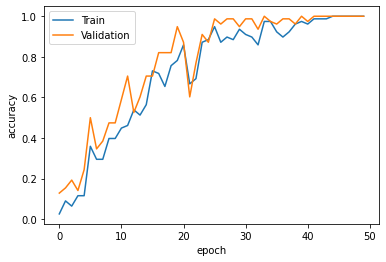

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Object:  hutieu


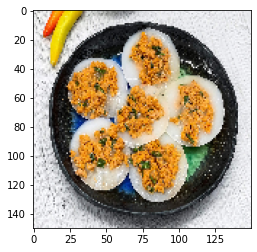

In [54]:
img = load_img('/content/drive/MyDrive/Food/PredictFood/banhbeo9.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['banhbeo',
 'banhchung',
 'banhmi',
 'banhxeo',
 'bunthitnuong',
 'bun',
 'comtam',
 'hutieu',
 'nemcha',
 'pho']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  banhchung


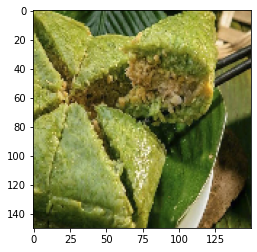

In [55]:
img = load_img('/content/drive/MyDrive/Food/PredictFood/banhchung9.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['banhbeo',
 'banhchung',
 'banhmi',
 'banhxeo',
 'bunthitnuong',
 'bun',
 'comtam',
 'hutieu',
 'nemcha',
 'pho']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  banhxeo


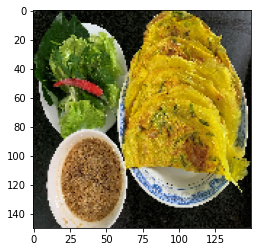

In [56]:
img = load_img('/content/drive/MyDrive/Food/PredictFood/banhxeo9.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['banhbeo',
 'banhchung',
 'banhmi',
 'banhxeo',
 'bunthitnuong',
 'bun',
 'comtam',
 'hutieu',
 'nemcha',
 'pho']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  pho


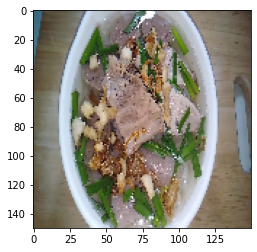

In [57]:
img = load_img('/content/drive/MyDrive/Food/PredictFood/hutieu9.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['banhbeo',
 'banhchung',
 'banhmi',
 'banhxeo',
 'bunthitnuong',
 'bun',
 'comtam',
 'hutieu',
 'nemcha',
 'pho']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])

Object:  bun


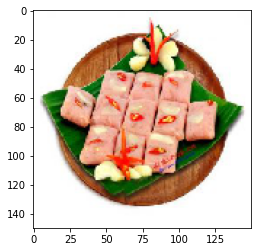

In [58]:
img = load_img('/content/drive/MyDrive/Food/PredictFood/nemcha9.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['banhbeo',
 'banhchung',
 'banhmi',
 'banhxeo',
 'bunthitnuong',
 'bun',
 'comtam',
 'hutieu',
 'nemcha',
 'pho']
print('Object: ',Label[int(np.argmax(classificationFood_model.predict(img),axis=-1))])